In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")


##for model traning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [66]:
train_df = pd.read_csv("data/train_df.csv")
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
test_df = pd.read_csv('data/test_df.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


## Basic inof about the data


In [68]:
train_df.shape,test_df.shape

((614, 13), (367, 12))

In [69]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [70]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Understanding col 

In [71]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
print(train_df['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [73]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [74]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [75]:
train_df.shape

(614, 13)

In [76]:
train_df.loc[train_df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [77]:
train_df.drop(columns=['Loan_ID'],axis='columns',inplace=True)

train_df.shape,

((614, 12),)

In [78]:
test_df.drop(columns=['Loan_ID'],axis='columns',inplace=True)
test_df.shape

(367, 11)

In [79]:
train_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


## Finding the missing values in the columns

In [80]:
null_info ={}
for col in train_df.columns:
    null_value = train_df[col].isnull().sum()
    datatype = train_df[col].dtype
    col_name = col
    
    null_info[col] =[col,null_value,datatype]

null_value_df = pd.DataFrame(null_info.values(),columns=['ColName','MissingValue','DataType'])

In [81]:
null_value_df = null_value_df.sort_values(by=['MissingValue'],ascending=False,ignore_index=True)
null_value_df

,ColName,MissingValue,DataType
0,Credit_History,50,float64
1,Self_Employed,32,object
2,LoanAmount,22,float64
3,Dependents,15,object
4,Loan_Amount_Term,14,float64
5,Gender,13,object
6,Married,3,object
7,Education,0,object
8,ApplicantIncome,0,int64
9,CoapplicantIncome,0,float64


In [104]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [82]:
num_col = train_df.select_dtypes(include=['int','float']).columns
num_col
cat_col = train_df.select_dtypes(include=['object']).columns
cat_col = cat_col[:-1]



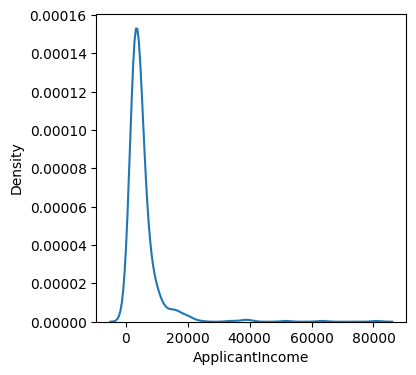

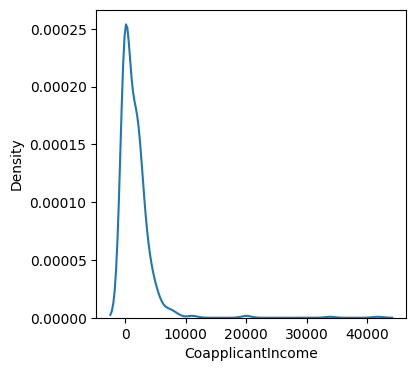

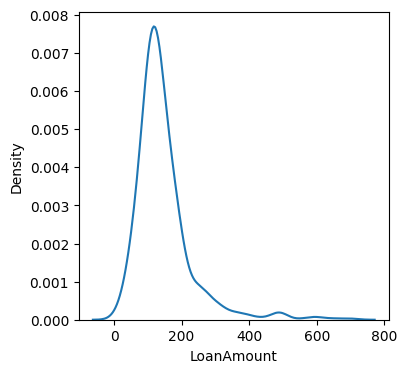

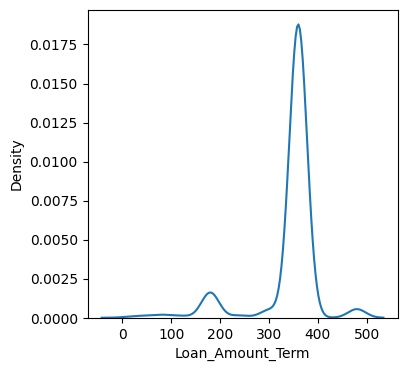

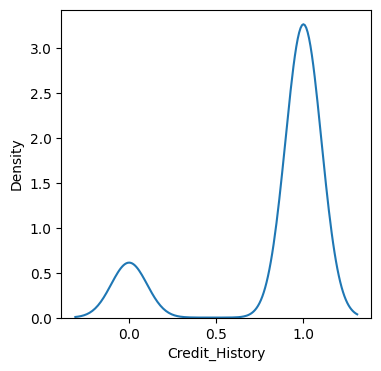

In [83]:
for col in num_col:


    
    plt.figure(figsize=(4,4))
    sns.kdeplot(train_df[col])

    plt.show()
    

In [84]:
'''for col in num_col:
    plt.figure(figsize=(5,5))
    sns.distplot(train_df[col])
    plt.show()

'''

'for col in num_col:\n    plt.figure(figsize=(5,5))\n    sns.distplot(train_df[col])\n    plt.show()\n\n'

# EDA


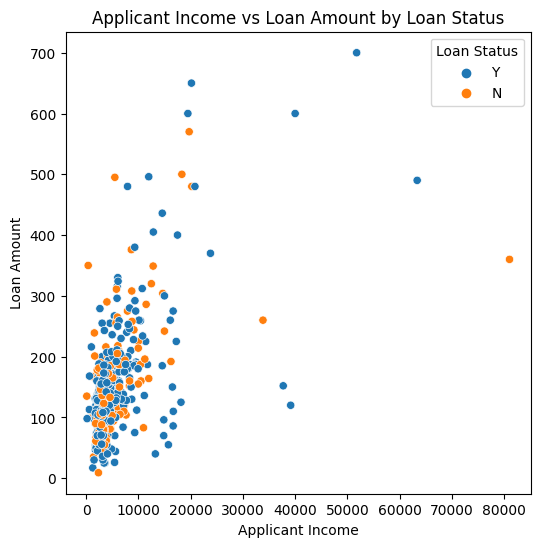

In [85]:
# Relationship between ApplicantIncome and LoanAmount
plt.figure(figsize=(6, 6))
sns.scatterplot(data=train_df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status')
plt.title('Applicant Income vs Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

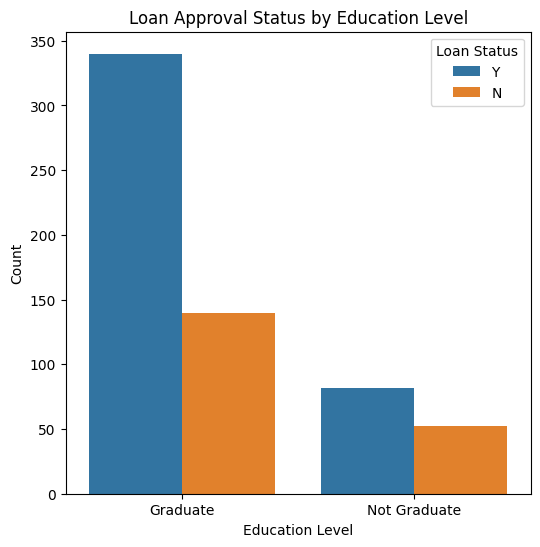

In [86]:
# Impact of Education level on Loan Approval Rates
plt.figure(figsize=(6, 6))
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title('Loan Approval Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

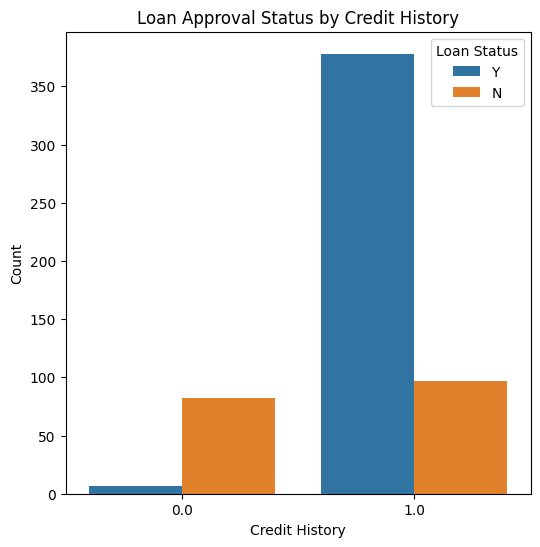

In [87]:
# Relationship between Credit History and Loan Approval Status
plt.figure(figsize=(6, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_df)
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

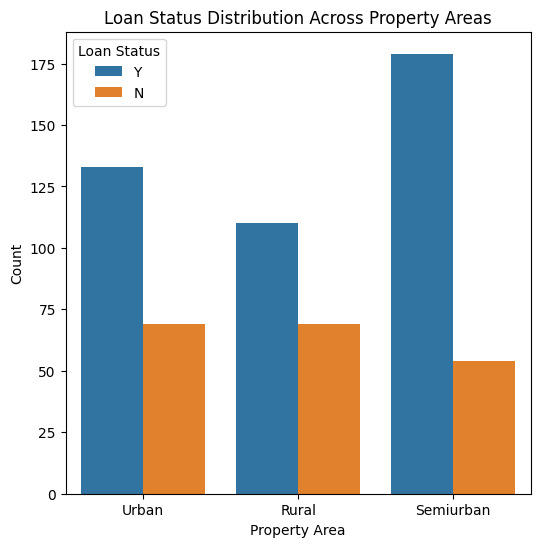

In [88]:
# Distribution of loans across different property areas
plt.figure(figsize=(6, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_df)
plt.title('Loan Status Distribution Across Property Areas')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

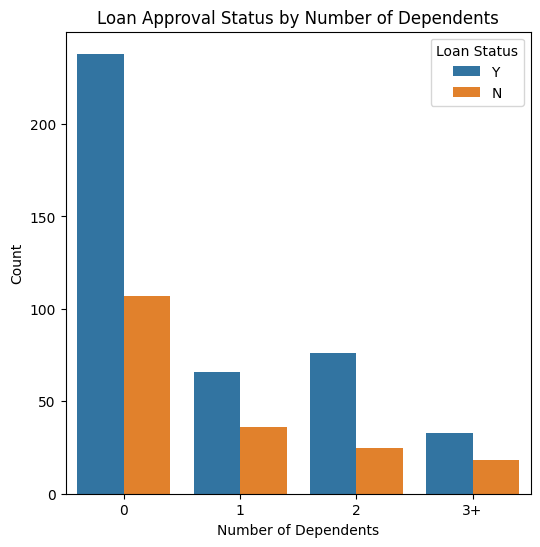

In [89]:
# Analyze the dependency of loan approval on the number of dependents
plt.figure(figsize=(6, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=train_df)
plt.title('Loan Approval Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

<Figure size 600x600 with 0 Axes>

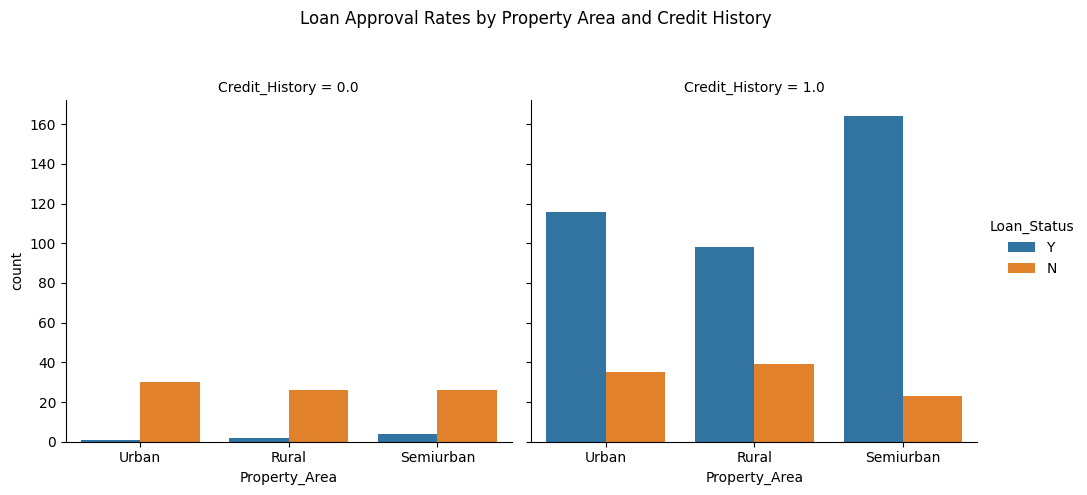

In [90]:
# Interaction between Property Area and Credit History on Loan Approval Rates
plt.figure(figsize=(6, 6))
sns.catplot(x='Property_Area', hue='Loan_Status', col='Credit_History', kind='count', data=train_df)
plt.subplots_adjust(top=0.8)
plt.suptitle('Loan Approval Rates by Property Area and Credit History')
plt.show()

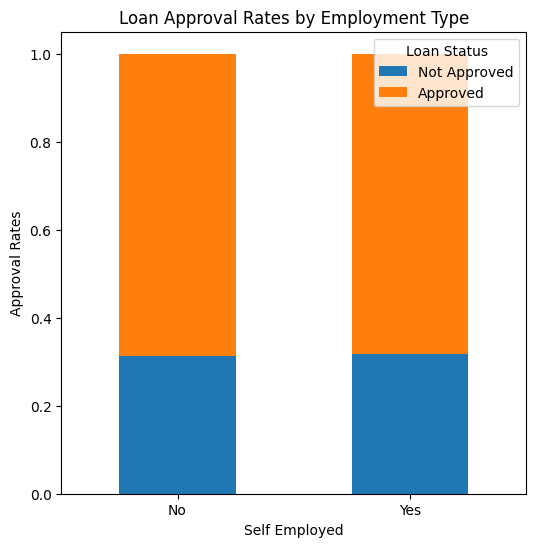

In [91]:
# Bar plot for Loan Approval by Employment Type

approval_rates = train_df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack()
approval_rates.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Loan Approval Rates by Employment Type')
plt.xlabel('Self Employed')
plt.ylabel('Approval Rates')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=0)
plt.show()

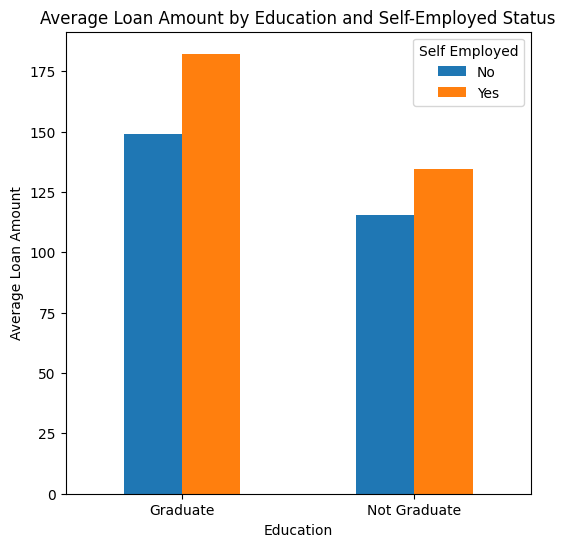

In [92]:
# Bar plot for Loan Amount Distribution by Education and Self-Employed
loan_amount_by_education_self_emp = train_df.groupby(['Education', 'Self_Employed'])['LoanAmount'].mean().unstack()
loan_amount_by_education_self_emp.plot(kind='bar', figsize=(6, 6))
plt.title('Average Loan Amount by Education and Self-Employed Status')
plt.xlabel('Education')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=0)
plt.legend(title='Self Employed', labels=['No', 'Yes'])
plt.show()

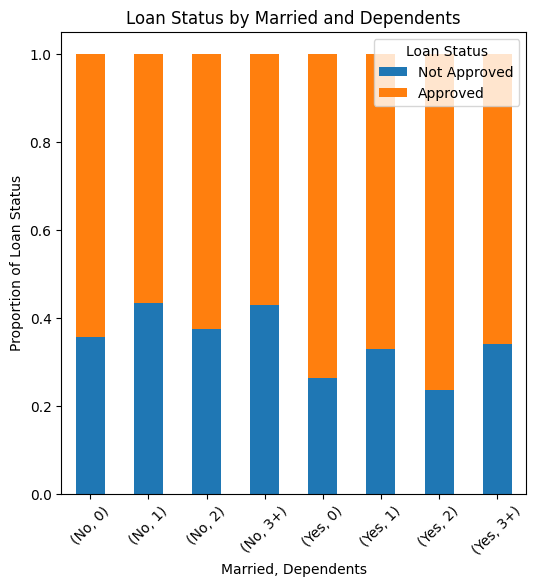

In [93]:
# Bar plot for Loan Status by Married and Dependents
status_by_married_dependents = train_df.groupby(['Married', 'Dependents'])['Loan_Status'].value_counts(normalize=True).unstack()
status_by_married_dependents.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.title('Loan Status by Married and Dependents')
plt.xlabel('Married, Dependents')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)
plt.show()

### Handeling missing values

In [94]:
'''


num_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
cat_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent') 

preprocessor_missing = ColumnTransformer([
    ('num_imputer', num_imputer, null_num_col),  
    ('cat_imputer', cat_imputer, null_cat_col)
],remainder='passthrough')

pipeline = Pipeline([
    ('null_imputer', preprocessor_missing)
])

transformed_data = pipeline.fit_transform(train_df)
'''

"\n\n\nnum_imputer = SimpleImputer(missing_values=np.nan,strategy='median')\ncat_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent') \n\npreprocessor_missing = ColumnTransformer([\n    ('num_imputer', num_imputer, null_num_col),  \n    ('cat_imputer', cat_imputer, null_cat_col)\n],remainder='passthrough')\n\npipeline = Pipeline([\n    ('null_imputer', preprocessor_missing)\n])\n\ntransformed_data = pipeline.fit_transform(train_df)\n"

In [95]:
null_num_col = ['Credit_History', 'LoanAmount', 'Loan_Amount_Term']
null_cat_col = ['Self_Employed', 'Dependents', 'Gender', 'Married']

def fill_nan_cat(df,col):
    for i in col:
        df[i].fillna(df[i].mode()[0],inplace= True)

fill_nan_cat(train_df,null_cat_col)
fill_nan_cat(test_df,null_cat_col)


In [96]:
def fill_nan_num(df,col):
    for i in col:
        df[i].fillna(df[i].median(),inplace=True)
fill_nan_num(train_df,null_num_col)
fill_nan_num(test_df,null_num_col)

In [97]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Handeling Outliers

In [99]:
def handel_outliers(df,col):

    for i in col:
        upper_lim = df[i].mean() + 3*df[i].std()
        lowe_lim = df[i].mean() - 3*df[i].std()

        df[i] = np.where(
            df[i] > upper_lim,
            upper_lim,
            np.where(
                df[i] < lowe_lim,
                lowe_lim,
                df[i]
            )
        )
        


In [100]:
handel_outliers(train_df,num_col)

## upsampleing the data


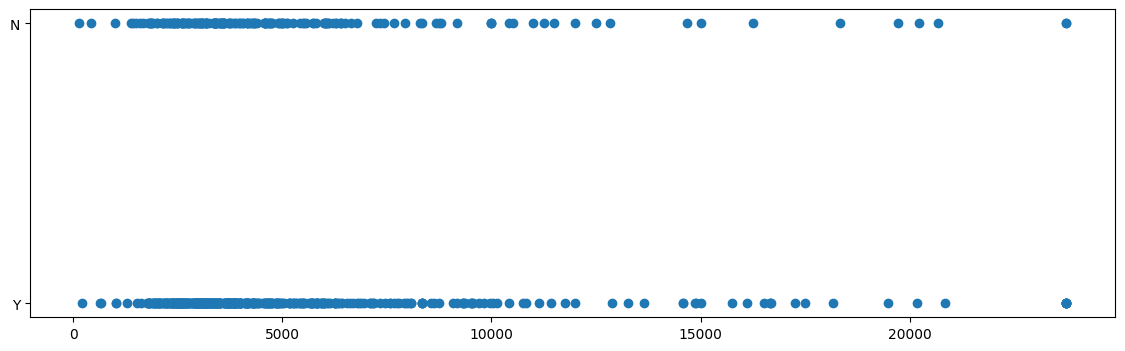

In [101]:
plt.figure(figsize=(14,4))
plt.scatter(train_df['ApplicantIncome'],train_df['Loan_Status'])

<Axes: xlabel='Loan_Status', ylabel='Count'>

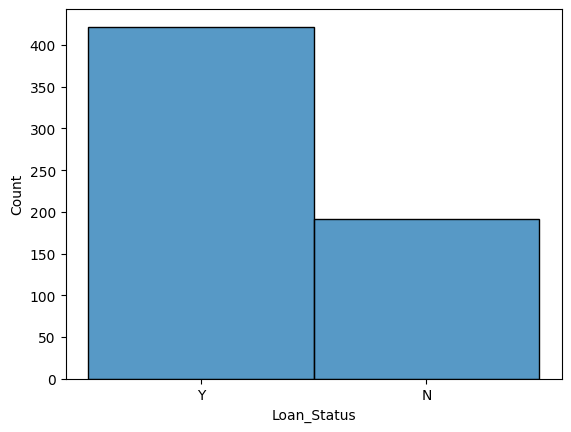

In [ ]:
sns.histplot(train_df['Loan_Status'])

In [ ]:
#performing upsampeling

from imblearn.over_sampling import RandomOverSampler
X = train_df.drop(columns=['Loan_Status'],axis='columns')
y = train_df['Loan_Status']
os = RandomOverSampler(random_state=42,sampling_strategy=0.8)
X_res,y_res = os.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

((759, 11), (759,))

In [ ]:
new_df = pd.concat([X_res,y_res],axis=1) #new upsampled dataframe

In [ ]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
new_df.shape

(759, 12)

In [ ]:
new_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
new_df['Loan_Status'].value_counts()

Y    422
N    337
Name: Loan_Status, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='Count'>

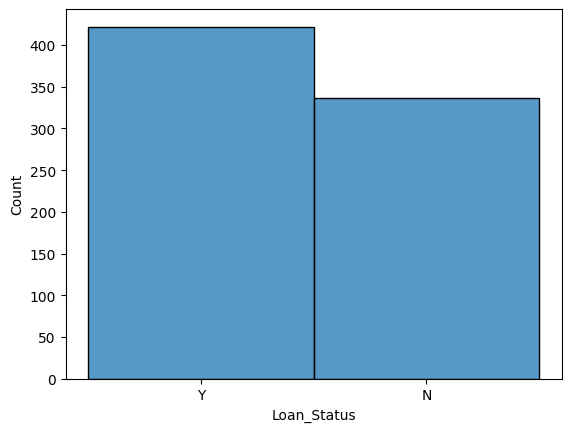

In [ ]:
sns.histplot(new_df['Loan_Status'])

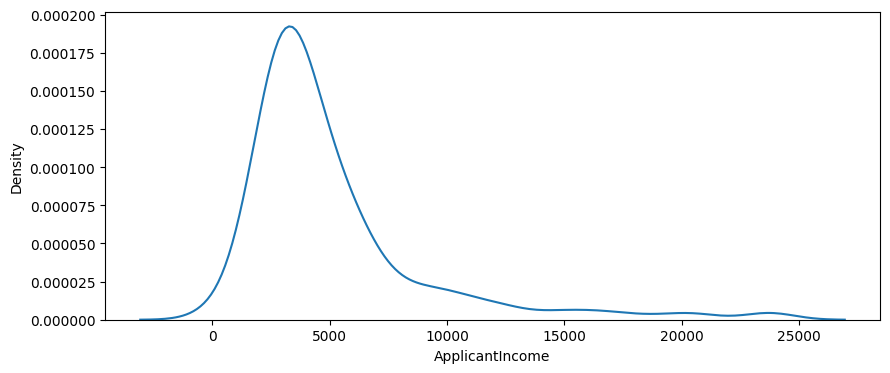

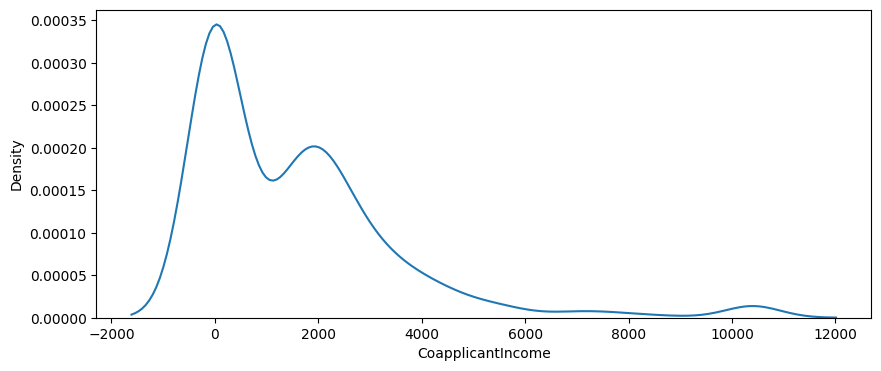

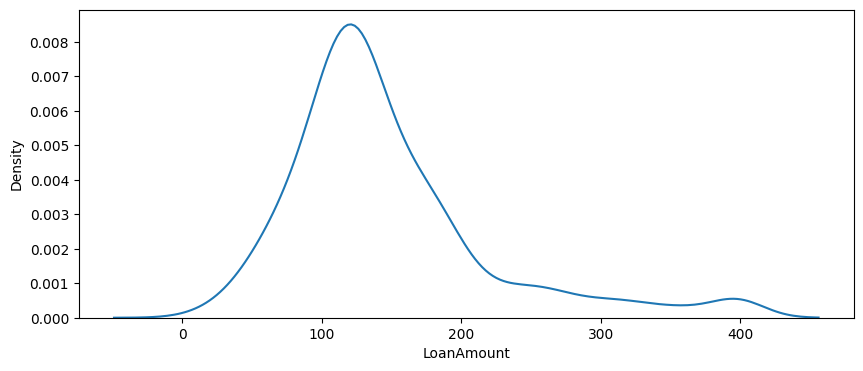

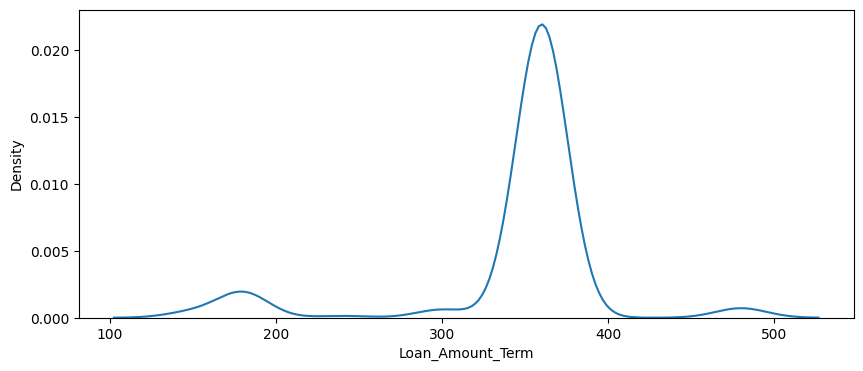

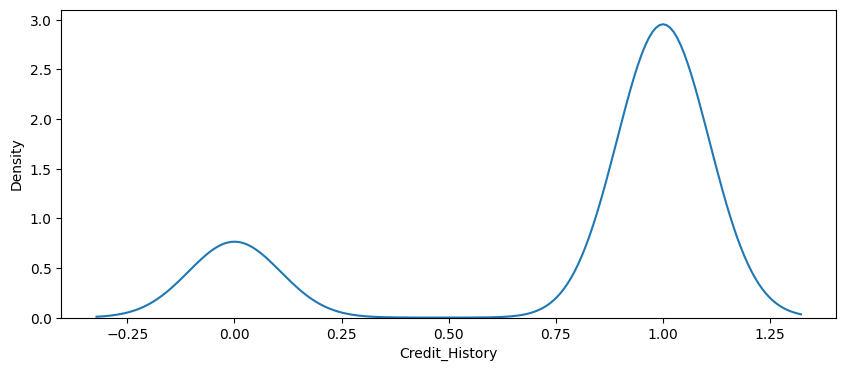

In [ ]:
# checking the distribution
new_num_col = new_df.select_dtypes(include=['float','int']).columns
for col in new_num_col:
    plt.figure(figsize=(10,4))
    sns.kdeplot(new_df[col])

In [ ]:
new_df.skew()

ApplicantIncome      2.461117
CoapplicantIncome    2.089974
LoanAmount           1.572051
Loan_Amount_Term    -1.925618
Credit_History      -1.460314
dtype: float64

## Data Transformation (making the data normlly distributed)

In [ ]:
from scipy import stats

In [ ]:


'''for i in new_num_col:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(new_df[i])

    plt.subplot(122)
    stats.probplot(new_df[i], dist='norm', plot=plt)


    plt.show()
'''

"for i in new_num_col:\n    plt.figure(figsize=(14,4))\n    plt.subplot(121)\n    sns.distplot(new_df[i])\n\n    plt.subplot(122)\n    stats.probplot(new_df[i], dist='norm', plot=plt)\n\n\n    plt.show()\n"

In [ ]:
''' 
use log for right skew data 
and sqrt for let skew data
'''



' \nuse log for right skew data \nand sqrt for let skew data\n'

In [ ]:
right_skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
left_skew = ['Loan_Amount_Term',]

In [ ]:
transformer1 = FunctionTransformer(np.log1p)

def square_transform(x):
    return np.square(x)

transformer2 = FunctionTransformer(square_transform)



In [ ]:
for col in right_skew:
    new_df[col] = transformer1.transform(new_df[col])
for col in left_skew:
    new_df[col] = transformer2.transform(new_df[col])



In [ ]:
new_df.skew()

ApplicantIncome     -0.330920
CoapplicantIncome   -0.187227
LoanAmount          -0.330103
Loan_Amount_Term    -0.902210
Credit_History      -1.460314
dtype: float64

In [ ]:
new_df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.0,4.859812,129600.0,1.0,Urban,Y


## creating pipeline 

In [ ]:
nominal_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first', sparse=False, dtype=np.int32))
])
ordinal_pipeline = Pipeline([
    ('ord', OrdinalEncoder(categories=[['Graduate', 'Not Graduate']]))  
])
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

In [ ]:
trnf = ColumnTransformer([
    ('nominal',nominal_pipeline,['Gender', 'Married', 'Dependents', 'Self_Employed',
       'Property_Area']),
    ('ordinal',ordinal_pipeline,['Education']),
    
    ('num',numerical_pipeline,new_num_col)
])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

pipeline1 = Pipeline([('preprocessor', trnf), ('model', LogisticRegression())])
pipeline2 = Pipeline([('preprocessor', trnf), ('model', RandomForestClassifier())])
pipeline3 = Pipeline([('preprocessor', trnf), ('model', SVC())])
pipeline4 = Pipeline([('preprocessor',trnf),('DecisionTree',DecisionTreeClassifier())])

In [ ]:
X_train = new_df.drop(columns=['Loan_Status'], axis=1)  
y_train = new_df["Loan_Status"]

X_test = test_df

In [ ]:
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nominal',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'numpy.int32'>,
                                                                                 sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Graduate',
                                                                                               'Not '
                                                                                               'Graduate']]))]),
                                                  ['Education']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'))])),
                ('model', SVC())])

In [105]:

from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(pipeline1, X_train, y_train, cv=5) 
scores2 = cross_val_score(pipeline2, X_train, y_train, cv=5)
scores3 = cross_val_score(pipeline3, X_train, y_train, cv=5)
scores4 = cross_val_score(pipeline4, X_train, y_train, cv=5)

print("LogisticRegression:", scores1.mean())
print("RandomForestClassifier:", scores2.mean())
print("SVC:", scores3.mean())
print("DecisionTreeClassifier:", scores4.mean())


LogisticRegression: 0.756317532241199
RandomForestClassifier: 0.8709829208783548
SVC: 0.7734227953990938
DecisionTreeClassifier: 0.8261937957476473
